Elisabeth Vehling
INF 352 Lab 1
Vertebral Column Data Set

**1(B): Pre-Processing and EDA**

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn as sk
import numpy as np

In [80]:
#Read in data to data frame and set column names
column_names = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope', 'pelvic_radius','degree_spondylolisthesis','class' ]
df = pd.read_csv("../Data/column_2C.dat", delimiter = ' ', index_col =False, names = column_names)

**(B. i) Scatterplots**

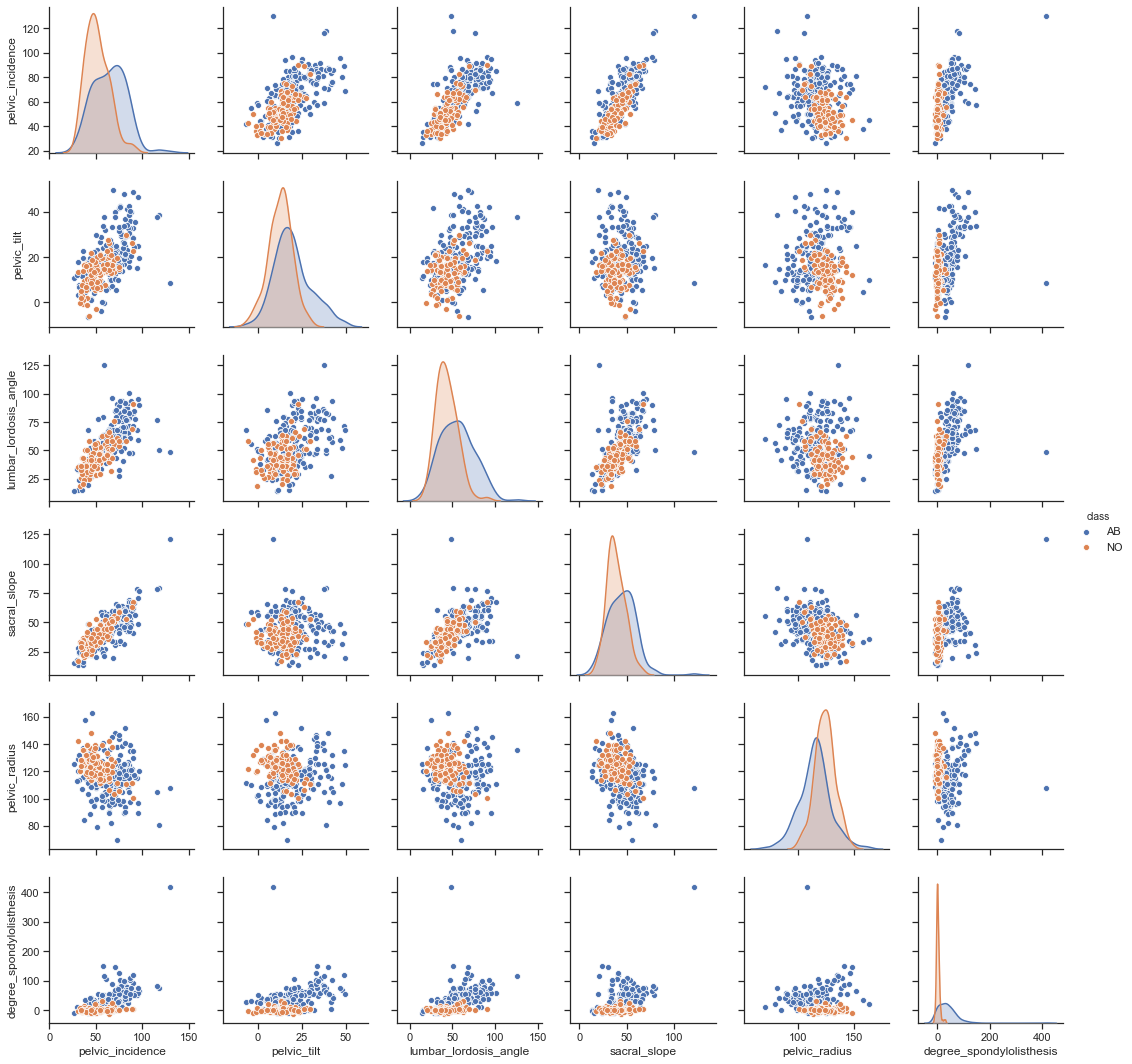

In [81]:
#i. Scatterplots of independent variables
sns.pairplot(df, hue = 'class')

**(B ii) Boxplots**

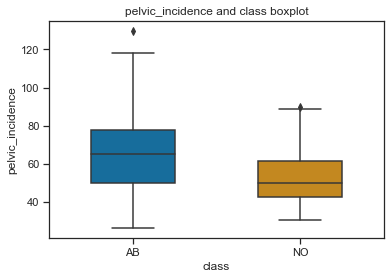

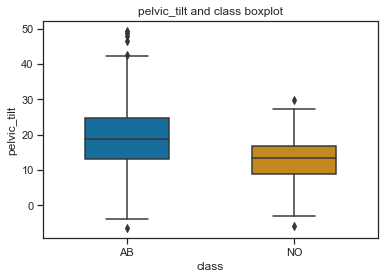

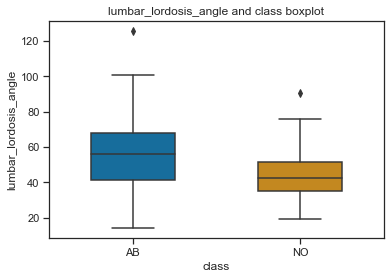

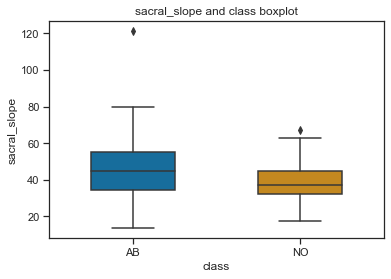

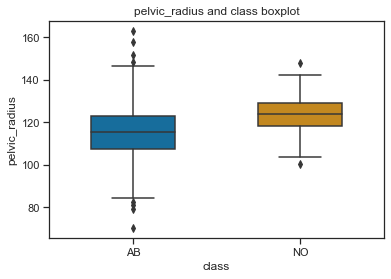

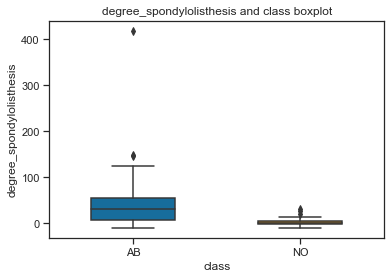

In [82]:
#ii. Box plots of independent variables
for i in range(len(df.columns)-1):
    plt.figure()
    bplot = sns.boxplot(y=df.columns[i], x='class', 
                 data=df, 
                 width=0.5,
                 palette="colorblind").set_title(df.columns[i]+' and class boxplot')

In [83]:
#Replace Class Labels with enumerated values
#(I didn't do this in the above plots for label clarity on figures)
df = df.replace(regex=r'^NO', value=0)
df = df.replace(regex=r'^AB', value=1)

**(B iii)**

In [84]:
#iii. Split training and test data

#First 70 of class NO for training, rest for testing
train1 = df.loc[df['class'] == 0] #Create copy df of all Class 0 rows
test1 = train1.iloc[70:,:] #Last rows of this df are testing data
train1 = train1.iloc[0:70,:] #First 70 rows of this df are training data

#First 140 of class AB for training, rest for testing
train2 = df.loc[df['class'] == 1] #Create copy df of all Class 1 rows
test2 = train2.iloc[140:,:] #Last rows of this are testing data
train2 = train2.iloc[0:140,:]#First 140 rows are training data

#Merge the above training and testing subsets to produce the final train and test dataframes
trainingData = pd.concat([train1, train2]) #New training/testing dfs that contain both classes
testingData = pd.concat([test1,test2])

In [85]:
#Break up into X,Y train and test sets
yTrain = trainingData['class'] #Use label column for the y training
xTrain = trainingData.drop(columns ='class') #Use all columns but class label to train model

yTest = testingData['class'] #Use label column for y testing
xTest = testingData.drop(columns='class') #Remaining columns are for testing model

In [86]:
yTest_F = testingData['class'] 
xTest_F = testingData.drop(columns='class')

yTrain_F = yTrain
xTrain_F = xTrain

**(C): KNN**

In [87]:
#i. Create a new KNN Classifier from sklearn with starting K of 5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xTrain, yTrain) #fit the model to the training data
prediction = classifier.predict(xTest) #use model to predict the classes of the data we saved for testing

**(C ii): Calculate and plot test errors in terms of k:**

In [89]:
#Calculate test errors
test_error = [] #Array to store the test errors for each K
min_error = 1 #lowest training error rate
min_k = 208 #K that produces the best training error rate
for i in range(208,1,-3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) #equivilent to 1-numCorrect/totalNum
    test_error.append(mean_error)
    if(mean_error < min_error): #Update the minimum error and best K
        min_k = i
        min_error = mean_error
best_test_K = min_k
best_test_error = min_error

Text(0, 0.5, 'Mean Error')

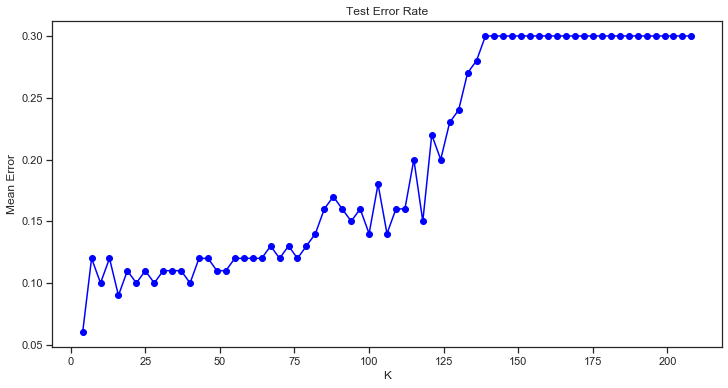

In [90]:
#Plot test errors
plt.figure(figsize=(12, 6))
plt.plot(range(208,1,-3), test_error, color='blue', marker='o',
         markerfacecolor='blue', markersize=6)
plt.title('Test Error Rate')
plt.xlabel('K')
plt.ylabel('Mean Error')

**Calculate and plot train errors in terms of k:**

In [91]:
#Calculate train error
#Repeat the above process but with the training data
train_error = []
min_error = 1
min_k = 208
for i in range(208,1,-3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain)
    train_error.append(mean_error)
    if(mean_error < min_error):
        min_k = i
        min_error = mean_error
best_train_K = min_k
train_error1 = best_train_K

Text(0, 0.5, 'Mean Error')

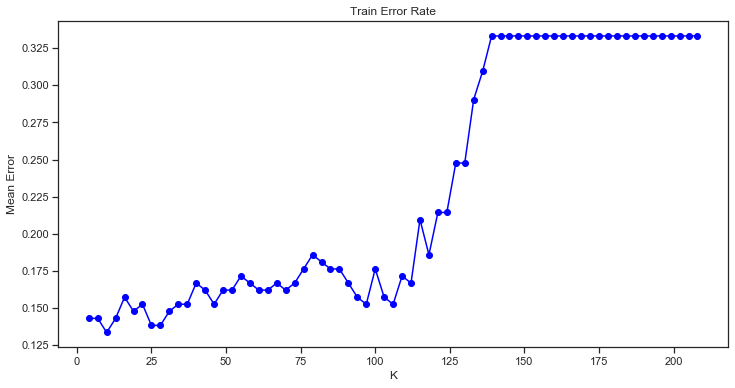

In [92]:
#Plot train error
plt.figure(figsize=(12, 6))
plt.plot(range(208,1,-3), train_error, color='blue', marker='o',
         markerfacecolor='blue', markersize=6)
plt.title('Train Error Rate')
plt.xlabel('K')
plt.ylabel('Mean Error')

**Summaries**

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
#Calculate and dispaly a summary of the results for testing data: includes the most suitable testing k, confusion matrix, 
#true positive and true negative rates, precision, and F score
print("------Test Summary-------")
print("Most suitible testing k:", best_test_K)
classifier = KNeighborsClassifier(n_neighbors=best_test_K)
classifier.fit(xTrain, yTrain)
prediction = classifier.predict(xTest)
cMatrix = confusion_matrix(yTest, prediction)
print("Confusion Matrix:\n",cMatrix)
tPRate = (cMatrix[0,0])/(cMatrix[0,0]+cMatrix[1,0]) #tpr = TP/TP+FN
tNRate = (cMatrix[1,1])/(cMatrix[1,1]+cMatrix[0,1])#tnr = TN/TN+FP
print("True Positive Rate:", tPRate)
print("True Negative Rate:",tNRate)
prec = (cMatrix[0,0])/(cMatrix[0,0]+cMatrix[0,1])#p = tp/tp+fp
print("Precision:", prec)
fscore = sk.metrics.f1_score(yTest,prediction) #fscore
print("F-score:",fscore)
print("\nComplete Testing Classification Report:\n")
print(classification_report(yTest, prediction))


------Test Summary-------
Most suitible testing k: 4
Confusion Matrix:
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.9615384615384616
True Negative Rate: 0.9324324324324325
Precision: 0.8333333333333334
F-score: 0.9583333333333333

Complete Testing Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [95]:
#Summary of results for the training data, 
print("------Train Summary-------")
print("Most suitible training k:", best_train_K)
classifier = KNeighborsClassifier(n_neighbors=best_train_K)
classifier.fit(xTrain, yTrain)
prediction = classifier.predict(xTrain)
cMatrix = confusion_matrix(yTrain, prediction)
print("Confusion Matrix:\n",cMatrix)
tPRate = (cMatrix[0,0])/(cMatrix[0,0]+cMatrix[1,0]) #tpr = TP/TP+FN
tNRate = (cMatrix[1,1])/(cMatrix[1,1]+cMatrix[0,1])#tnr = TN/TN+FP
print("True Positive Rate:", tPRate)
print("True Negative Rate:",tNRate)
prec = (cMatrix[0,0])/(cMatrix[0,0]+cMatrix[0,1])#p = tp/tp+fp
print("Precision:", prec)
fscore = sk.metrics.f1_score(yTrain,prediction) #fscore
print("F-score:",fscore)
print("\nComplete Training Classification Report:\n")
print(classification_report(yTrain, prediction))
print("-----------------")


------Train Summary-------
Most suitible training k: 10
Confusion Matrix:
 [[ 55  15]
 [ 13 127]]
True Positive Rate: 0.8088235294117647
True Negative Rate: 0.8943661971830986
Precision: 0.7857142857142857
F-score: 0.900709219858156

Complete Training Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        70
           1       0.89      0.91      0.90       140

    accuracy                           0.87       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.87      0.87      0.87       210

-----------------


In [96]:
#iii. Plot best test error rate against size of training set

In [97]:
#Calculate test errors
best_ks = []
best_test_error = []
for n in range(10,210,10): #sizes of training set incremented from 10 to 210 
    #Split training and test data: First n/3 of class NO for training, rest for testing
    train1_index = int(np.floor(n/3)) #get index for n/3
    train1 = df.loc[df['class'] == 0] #repeat the process used above
    #test1 = train1.iloc[train1_index:,:] #get testing rows
    train1 = train1.iloc[0:train1_index,:] #get training rows

    #First n-n/3 rows of class AB for training, rest for testing
    train2_index = n - train1_index
    train2 = df.loc[df['class'] == 1]
    train2 = train2.iloc[0:train2_index,:]#get rest of training rows

    #Merge the above dfs to produce the final train and test dataframes
    trainingData = pd.concat([train1, train2]) 
    
    #Break up into X,Y train and test sets
    yTrain = trainingData['class']
    xTrain = trainingData.drop(columns ='class')

    yTest = yTest_F
    xTest = xTest_F  
    
    #find optimal k and lowest test error
    min_error = 1
    min_k = n
    for i in range(1,n-5,5):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(xTrain, yTrain)
        pred_i = knn.predict(xTest)
        mean_error = np.mean(pred_i != yTest)
        if(mean_error < min_error):
            min_k = i
            min_error = mean_error
    best_test_error.append(min_error)
    best_ks.append(min_k)

In [98]:
xAxis = np.linspace(10,200,20)

Text(0.5, 1.0, 'Best K for Training Set Size')

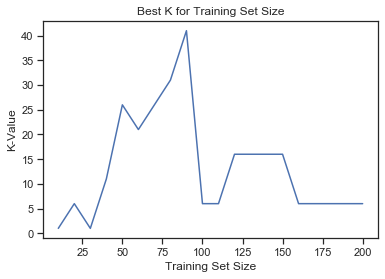

In [99]:
#plot the array of best Ks against size of training set
plt.plot(xAxis,best_ks)
plt.ylabel('K-Value')
plt.xlabel('Training Set Size')
plt.title('Best K for Training Set Size')

Text(0.5, 1.0, 'Best Test Error Rate for Training Set Size')

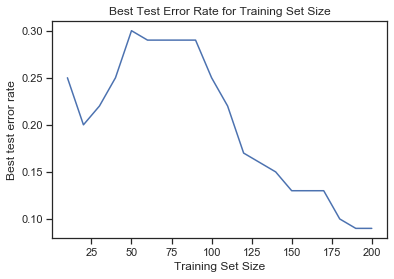

In [100]:
#Plot the array of best test errors against the training set size
plt.plot(xAxis,best_test_error)
plt.ylabel('Best test error rate')
plt.xlabel('Training Set Size')
plt.title('Best Test Error Rate for Training Set Size')

**Extra Credit**

**(d)**

In [58]:
#(d) Replacing the Euclidean metric
yTest = yTest_F
xTest = xTest_F
xTrain = xTrain_F
yTrain = yTrain_F

#Test errors for Minkowski distance with p = 1 (manhattan distance)
minkowski_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    minkowski_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_Minkowski_K = min_k
best_Minkowski_error = min_error

In [104]:
#Train errors for Minkowski distance with p = 1 (manhattan distance)
minkowski_train_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    minkowski_train_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_Minkowski_Train_K = min_k
best_Minkowski_Train_error = min_error

In [105]:
#test errors for manhattan distance (p = 1)
minkowski_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    minkowski_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_manhattan_K = min_k
best_manhattan_error = min_error

In [106]:
#train errors for manhattan distance (p = 1)
minkowski_train_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    minkowski_train_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_manhattan_train_error = min_error

In [108]:
#test errors for Minkowski distance with p = log10(p) (manhattan distance)
#fix k,  and iterate through p
partB_test_error = []
min_error = 1 
r = np.arange(0.1,1,0.1)
#best_Minkowski_K
for p in r:
    knn = KNeighborsClassifier(n_neighbors=best_Minkowski_K, p=10**p)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    partB_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_partB_K = min_k
best_partB_error = min_error

In [109]:
#Train errors for Minkowski distance with p = log10(p)
partB_train_error = []
min_error = 1 
r = np.arange(0.1,1,0.1)
for p in r:
    knn = KNeighborsClassifier(n_neighbors=best_Minkowski_Train_K, p=10**p)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    partB_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_partB_Train_error = min_error

In [61]:
#metric = "Chebyshev"
#test errors for Chebyshev distance 
cheby_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev')
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    cheby_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_cheby_K = min_k
best_cheby_error = min_error

In [110]:
#Train errors for Chebyshev distance 
cheby_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev')
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    cheby_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_cheby_Train_error = min_error

In [62]:
#test errors for Mahalanobis distance 
maha_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'mahalanobis', metric_params={'V':np.cov(xTrain_F.T)})
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    maha_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_maha_K = min_k
best_maha_error = min_error

In [111]:
#Train errors for Mahalanobis distance 
maha_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'mahalanobis', metric_params={'V':np.cov(xTrain_F.T)})
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    maha_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_maha_Train_error = min_error

In [112]:
#print out the best k and the best corresponding test error
data = {'Minkowski':[best_Minkowski_K,best_Minkowski_error],'Manhattan':[best_manhattan_K, best_manhattan_error], 'log(10)p':[best_partB_K, best_partB_error], 'Chebyshev':[best_cheby_K, best_cheby_error], 'Mahalanobis':[best_maha_K, best_maha_error]}
bestK = pd.DataFrame(data)
bestK.set_axis(labels = ['K Value', 'Best Test Error'], axis=0)
print(bestK)

                 Minkowski  Manhattan  log(10)p  Chebyshev  Mahalanobis
K Value               6.00      11.00    191.00      16.00         1.00
Best Test Error       0.08       0.11      0.06       0.08         0.17


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  after removing the cwd from sys.path.


**(e) Weighted Decision**

In [66]:
#Test error Euclidean weighted voting
weighted_Eu_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean', weights = "distance")
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    weighted_Eu_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_weighted_Eu_K = min_k
best_weighted_Ed_error = min_error

In [113]:
#Train error Euclidean weighted voting
weighted_Eu_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean', weights = "distance")
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    weighted_Eu_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_weighted_Ed_Train_error = min_error

In [67]:
#Test error Manhattan weighted voting
weighted_M_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1, weights = "distance")
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    weighted_M_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_weighted_M_K = min_k
best_weighted_M_error = min_error

In [114]:
#Train error Manhattan weighted voting
weighted_M_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1, weights = "distance")
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    weighted_M_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_weighted_M_train_error = min_error

In [68]:
#Test error Chebyshev weighted voting
weighted_Ch_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev', weights = "distance")
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    mean_error = np.mean(pred_i != yTest) 
    weighted_Ch_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_weighted_Ch_K = min_k
best_weighted_Ch_error = min_error

In [115]:
#Train error Chebyshev weighted voting
weighted_Ch_test_error = []
min_error = 1 
min_k = 196 
for i in range(1,196,5):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'chebyshev', weights = "distance")
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTrain)
    mean_error = np.mean(pred_i != yTrain) 
    weighted_Ch_test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_weighted_Ch_Train_error = min_error

In [117]:
weighted_data = {'Euclidean':[best_weighted_Eu_K,best_weighted_Ed_error],'Manhattan':[best_weighted_M_K,best_weighted_M_error], 'Chebyshev':[best_weighted_Ch_K, best_weighted_Ch_error]}
best_weighted_K = pd.DataFrame(weighted_data)
best_weighted_K.set_axis(labels = ['K Value', 'Best Test Error'], axis=0)
print("Weighted Voting:")
print(best_weighted_K)


Weighted Voting:
                 Euclidean  Manhattan  Chebyshev
K Value                6.0       26.0      16.00
Best Test Error        0.1        0.1       0.11


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [137]:

training_error_data = {'Name':['Euclidean','Minkowski','Manhattan',
    'Log10(p)','Chebyshev','Mahalanobis','Weighted Euclidean',
    'Weighted Manhattan',"Weighted Chebyshev"], 
    "Min Train Error": [train_error1,best_Minkowski_Train_error,best_manhattan_train_error,
    best_partB_Train_error,best_cheby_Train_error,best_maha_Train_error,
    best_weighted_Ed_Train_error,best_weighted_M_train_error,best_weighted_Ch_Train_error  ]}
                                            
best_train_error = pd.DataFrame(training_error_data)
print("Training Error")

Training Error
                 Name  Min Train Error
0           Euclidean             10.0
1           Minkowski              0.0
2           Manhattan              0.0
3            Log10(p)              0.0
4           Chebyshev              0.0
5         Mahalanobis              0.0
6  Weighted Euclidean              0.0
7  Weighted Manhattan              0.0
8  Weighted Chebyshev              0.0


The lowest training error rate I achieved in this homework was 0.0